# Python Data Visualization 
This project served as part of the Final Project for the "Data Visualization with Python" course in the IBM Data Analyst Professional Certificate. In this assignment, I created visualizations using Matplotib, Seaborn and Folium.

## Project Setup

In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import folium
import requests
import io

### Importing Data


In [180]:
# URL of the CSV file
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch the data from the URL
response = requests.get(URL)

# Convert the response content into a readable format for pandas
csv_content = io.StringIO(response.text)

# Read the CSV data into a pandas dataframe
df = pd.read_csv(csv_content)

# Clean up vehicle type names globally -- for better visualization display
vehicle_name_mapping = {
    'Executivecar': 'Executive Car',
    'Mediumfamilycar': 'Medium Family Car', 
    'Smallfamiliycar': 'Small Family Car',
    'Sports': 'Sports Car',
    'Supperminicar': 'Supermini Car'
}

df['Vehicle_Type'] = df['Vehicle_Type'].replace(vehicle_name_mapping)


In [181]:
# inspect data
df.head(10)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supermini Car,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supermini Car,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Medium Family Car,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supermini Car,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Small Family Car,California
5,6/30/1980,1980,Jun,1,105.55,0.75,23829.315,2573,5,20.298,-1.610947,2.9,754.5,Medium Family Car,Illinois
6,7/31/1980,1980,Jul,1,82.45,0.50,32896.064,2828,3,34.585,0.413098,2.9,729.6,Supermini Car,Illinois
7,8/31/1980,1980,Aug,1,98.76,0.25,28837.174,2917,3,55.650,0.378527,3.0,734.9,Supermini Car,New York
8,9/30/1980,1980,Sep,1,87.68,0.07,22652.628,1138,3,33.308,-0.670770,5.2,705.6,Small Family Car,California
9,10/31/1980,1980,Oct,1,101.45,0.00,27712.800,4582,5,42.522,0.216688,4.4,609.7,Small Family Car,New York


In [182]:
# inspect data
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [183]:
# inspect data
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


## Create Visualizations for Data Analysis


#### Create a *Line chart* using pandas to show how automobile sales fluctuate from year to year

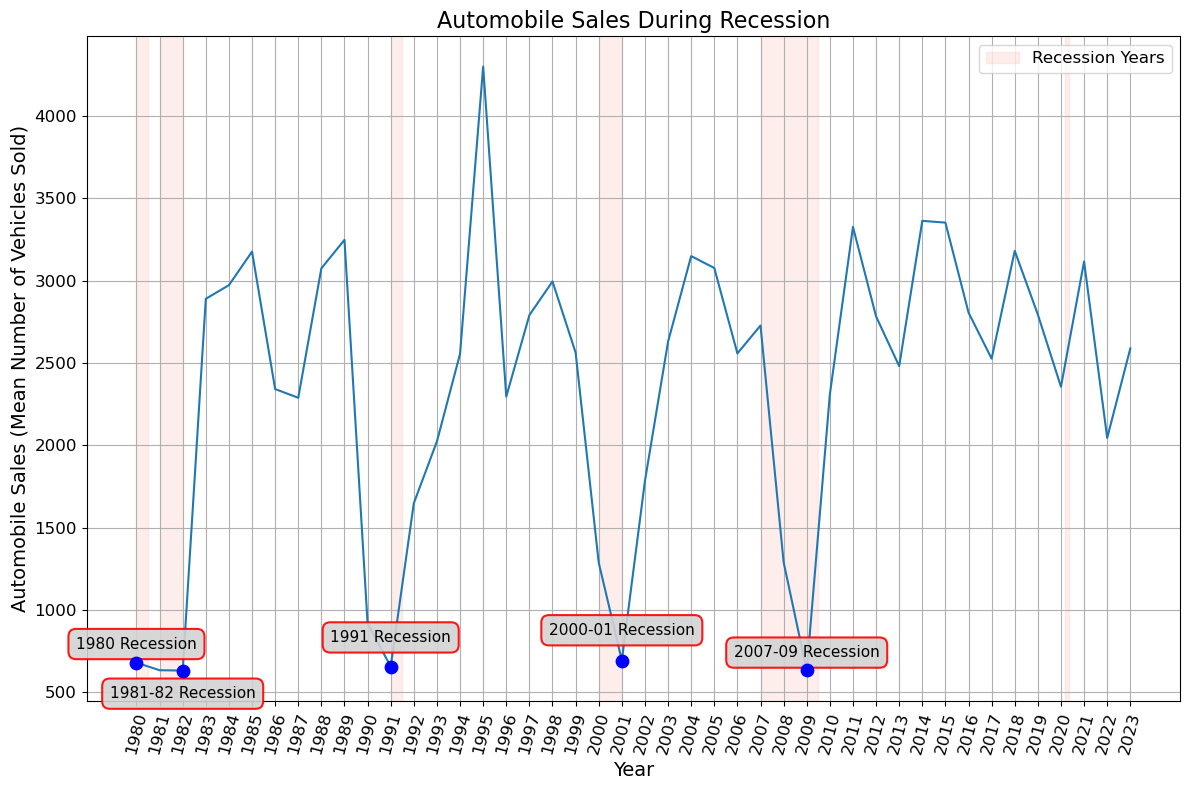

In [193]:
# make the plot more detailed 
# define recession periods
recessions = [
    {'label': '1980 Recession',      'start': 1980,       'end': 1980},
    {'label': '1981-82 Recession',   'start': 1981,       'end': 1982},
    {'label': '1991 Recession',      'start': 1991,       'end': 1991},
    {'label': '2000-01 Recession',   'start': 2000,       'end': 2001},
    {'label': '2007-09 Recession',   'start': 2007,       'end': 2009.5},
    {'label': '2020 Covid-19 Impact','start': 2020 + 2/12,'end': 2020 + 4/12}
]

# create the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()
df_line.plot(kind='line', ax=ax)
plt.xticks(list(range(1980, 2024)), rotation=75, fontsize=12)
plt.yticks(fontsize=12)

# add labels 
plt.xlabel('Year', fontsize=14)
plt.ylabel('Automobile Sales (Mean Number of Vehicles Sold)', fontsize=14)
plt.title('Automobile Sales During Recession', fontsize=16)

# shade recession periods
for recession in recessions:
    start = recession['start']
    end = recession['end']
    if start == end:
        end += 0.5  # ensure width
    plt.axvspan(start, end, color='#feab9e', alpha=0.2)

# add recession lows annotations
label_positions = []

for i, recession in enumerate(recessions):
    mask = (df_line.index >= recession['start']) & (df_line.index <= recession['end'])
    recession_data = df_line.loc[mask]
    if not recession_data.empty:
        min_year = recession_data.idxmin()
        min_val = recession_data.min()
        if isinstance(min_year, pd.Series):
            min_year = min_year.values[0]
        if isinstance(min_val, pd.Series):
            min_val = min_val.values[0]
        # add points of lows
        plt.scatter(min_year, min_val, color='blue', s=80, zorder=5) 
        if i == 0:
            offset_y = min_val + 0.1 * min_val
            va = 'bottom'
        elif i == 1:
            offset_y = min_val - 0.15 * min_val
            va = 'top'
        else:
            offset_y = min_val + 0.1 * min_val
            while any(abs(offset_y - y) < 0.05 * min_val for y in label_positions):
                offset_y += 0.05 * min_val
            va = 'bottom'
        label_positions.append(offset_y)
        plt.text(
            min_year, offset_y,
            recession['label'],
            fontsize=11,
            ha='center',
            va=va,
            color='black',
            bbox=dict(facecolor='lightgray', edgecolor='red', boxstyle='round,pad=0.5', linewidth=1.5, alpha=0.9)
        )

# create legend
red_patch = mpatches.Patch(color='#feab9e', alpha=0.2, label='Recession Years')
plt.legend(handles=[red_patch], loc='upper right', fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

---



###  Plot different lines for categories of vehicle type 
*Is there a noticeable difference in sales trends between different vehicle types during recession periods?*


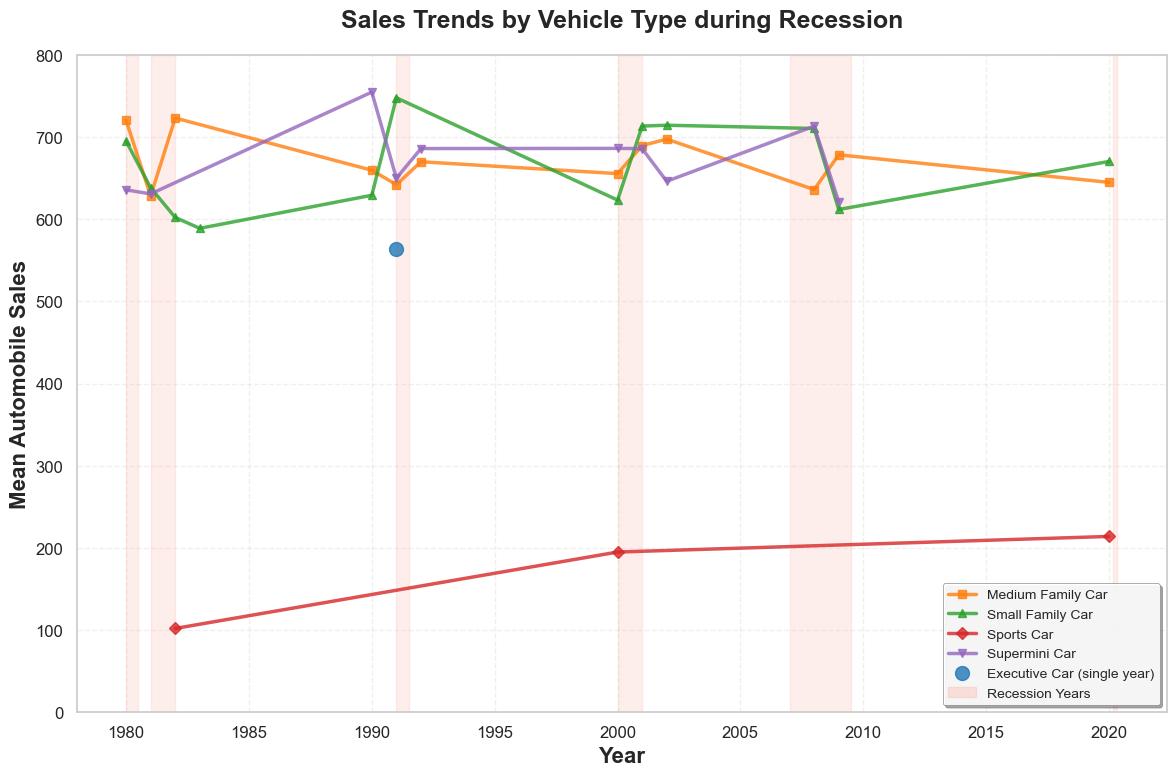

In [215]:
# Filter only recession data
df_rec = df[df['Recession'] == 1]

# Group by year and vehicle type, compute mean sales
df_line2 = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Pivot the data so each vehicle type becomes a column
df_pivot = df_line2.pivot(index='Year', columns='Vehicle_Type', values='Automobile_Sales')

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors and markers for consistency
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
markers = ['o', 's', '^', 'D', 'v', 'p']

for i, vehicle_type in enumerate(df_pivot.columns):
    # Get only the actual data (no filling)
    vehicle_data = df_pivot[vehicle_type].dropna()
    
    if len(vehicle_data) > 0:
        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]
        
        if len(vehicle_data) == 1:
            # for types with only 1 single point, show as larger marker, no line
            ax.scatter(vehicle_data.index, vehicle_data.values, 
                      color=color, s=100, marker=marker, 
                      label=f'{vehicle_type} (single year)', alpha=0.8, zorder=5)
        else:
            # else, plot points and connect with lines
            ax.plot(vehicle_data.index, vehicle_data.values, 
                   color=color, marker=marker, linewidth=2.5, markersize=6, 
                   label=vehicle_type, linestyle='-', alpha=0.8)

# Set limits and formatting
ax.set_ylim(0, 800)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.set_xlabel('Year', fontsize=16, fontweight='bold')
ax.set_ylabel('Mean Automobile Sales', fontsize=16, fontweight='bold')
ax.set_title('Sales Trends by Vehicle Type during Recession', pad=20, fontsize=18, fontweight='bold')

# Shade recession periods
for recession in recessions:
    start = recession['start']
    end = recession['end']
    if start == end:
        end += 0.5  # ensure width
    plt.axvspan(start, end, color='#feab9e', alpha=0.2)

# Create legend
handles, labels = ax.get_legend_handles_labels()
recession_patch = mpatches.Patch(color='#feab9e', alpha=0.3, label='Recession Years')
handles.append(recession_patch)
labels.append('Recession Years')

legend = ax.legend(
    handles=handles,
    labels=labels,
    loc='lower right',
    fontsize=10,
    frameon=True,
    fancybox=True,
    shadow=True,
    framealpha=0.9
)

# Style the legend
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('gray')
legend.get_frame().set_linewidth(0.5)

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

----


### Use **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period

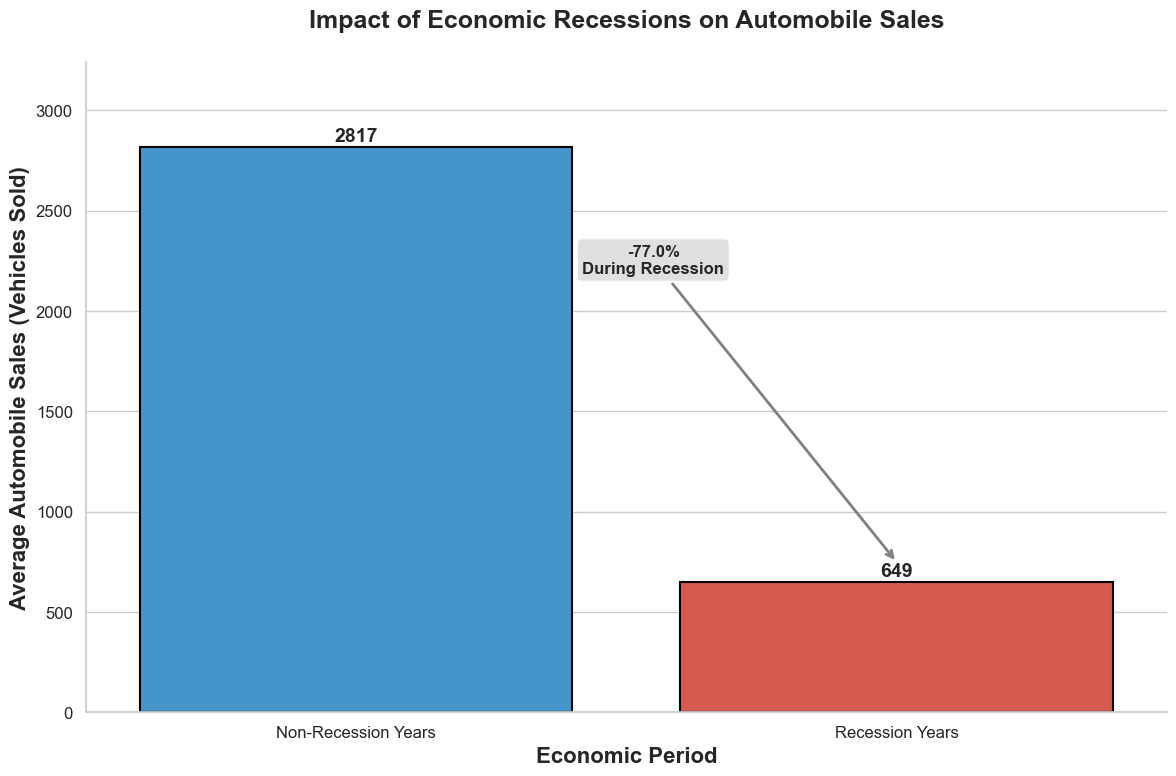

In [211]:
# Set seaborn style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create new df that groups by recession or not and finds the mean sales in each condition
com_rec_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the figure
plt.figure(figsize=(12, 8))
colors = ['#3498DB','#E74C3C']  # blue for non-recession, red for recession

ax = sns.barplot(
    data=com_rec_df, 
    x='Recession', 
    y='Automobile_Sales',
    palette=colors,
    saturation=0.8,
    edgecolor='black',
    linewidth=1.5
)

ax.set_xticklabels(['Non-Recession Years', 'Recession Years'], fontsize=14)

# Add value labels on top of bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x()+bar.get_width()/2, height+10,
             f'{height:.0f}',
             ha='center', va='bottom',
             fontsize=14, fontweight='bold')

# Calculate percentage difference between non-recession and recession for added detail
non_rec_sales = com_rec_df[com_rec_df['Recession'] == 0]['Automobile_Sales'].iloc[0]
rec_sales = com_rec_df[com_rec_df['Recession'] == 1]['Automobile_Sales'].iloc[0]
pct_change = ((rec_sales-non_rec_sales)/non_rec_sales)*100

# Add percentage difference annotation
arrow_y = max(com_rec_df['Automobile_Sales'])*0.8
ax.annotate(
    f'{pct_change:+.1f}%\nDuring Recession',
    xy=(1, rec_sales + 100),  # Arrow points higher up on the bar
    xytext=(0.55, arrow_y),   # Box moved more to the right
    ha='center', va='center',
    fontsize=12, fontweight='bold',
    bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.7),
    arrowprops=dict(arrowstyle='->', lw=2, color='gray')
)

# Set labels and title
ax.set_xlabel('Economic Period', fontsize=16, fontweight='bold')
ax.set_ylabel('Average Automobile Sales (Vehicles Sold)', fontsize=16, fontweight='bold')
ax.set_title('Impact of Economic Recessions on Automobile Sales\n', fontsize=18, fontweight='bold')

# Style the axes
ax.tick_params(labelsize=12)
ax.set_ylim(0, max(com_rec_df['Automobile_Sales']) * 1.15)
sns.despine()

plt.tight_layout()
plt.show()

### Compare the sales of different vehicle types during a recession and a non-recession period

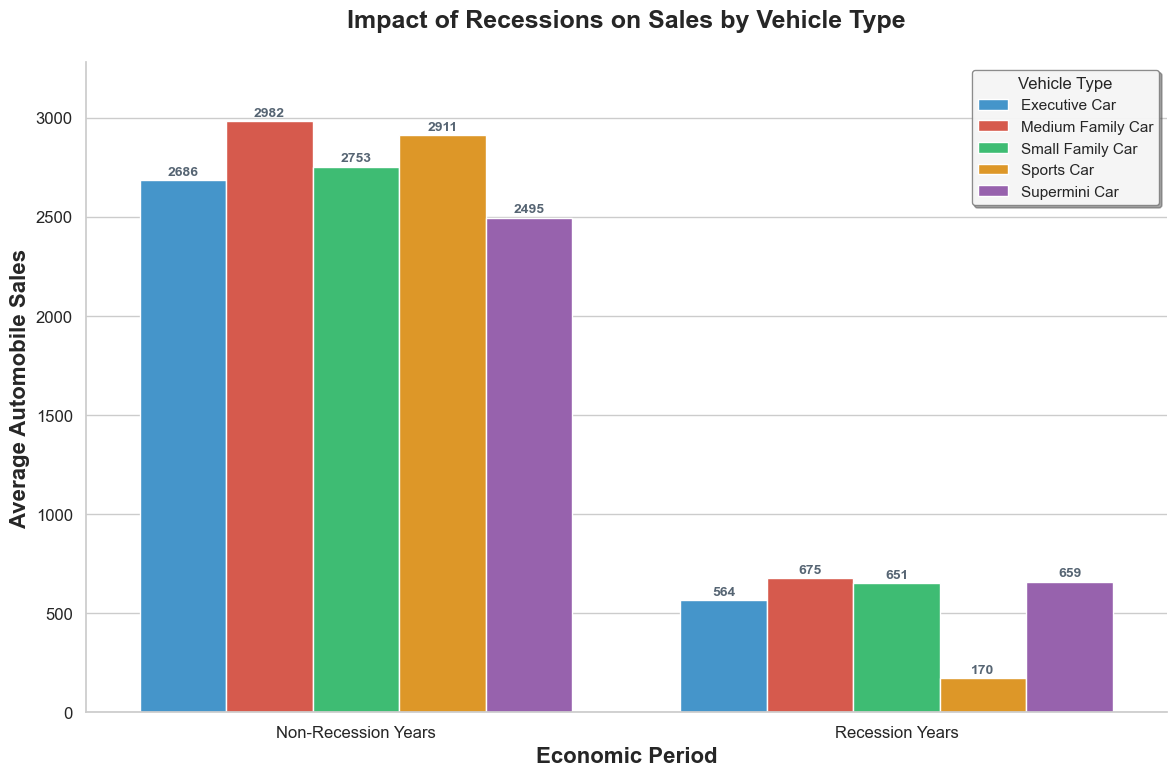

In [220]:
# Set seaborn style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Calculate the total sales volume by vehicle type during recessions
comp_veh_rec = df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the figure
plt.figure(figsize=(12, 8))

# Define color palette for vehicle types
vehicle_colors = ['#3498DB', '#E74C3C', '#2ECC71', '#F39C12', '#9B59B6', '#1ABC9C']

# Create the seaborn bar chart
ax = sns.barplot(
    data=comp_veh_rec, 
    x='Recession', 
    y='Automobile_Sales',
    hue='Vehicle_Type',
    palette=vehicle_colors,
    saturation=0.8
)
ax.set_xticklabels(['Non-Recession Years', 'Recession Years'], fontsize=14)

# Add value labels on top of bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    if height > 0:  # Label all bars with values
        ax.text(bar.get_x() + bar.get_width()/2, height + 10,
                 f'{height:.0f}',
                 ha='center', va='bottom',
                 fontsize=10, fontweight='bold',
                 color='#2C3E50', alpha=0.8)

# Set labels and title
ax.set_xlabel('Economic Period', fontsize=16, fontweight='bold')
ax.set_ylabel('Average Automobile Sales', fontsize=16, fontweight='bold')
ax.set_title('Impact of Recessions on Sales by Vehicle Type\n', fontsize=18, fontweight='bold')
ax.tick_params(labelsize=12)
ax.set_ylim(0, max(comp_veh_rec['Automobile_Sales']) * 1.1)

# Enhance the legend
legend = ax.legend(
    title='Vehicle Type',
    fontsize=11,
    title_fontsize=12,
    frameon=True,
    fancybox=True,
    shadow=True,
    framealpha=0.9,
    loc='upper right'
)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('gray')

sns.despine()
plt.tight_layout()
plt.show()

---


### Use sub plotting to compare the variations in GDP during recession and non-recession period

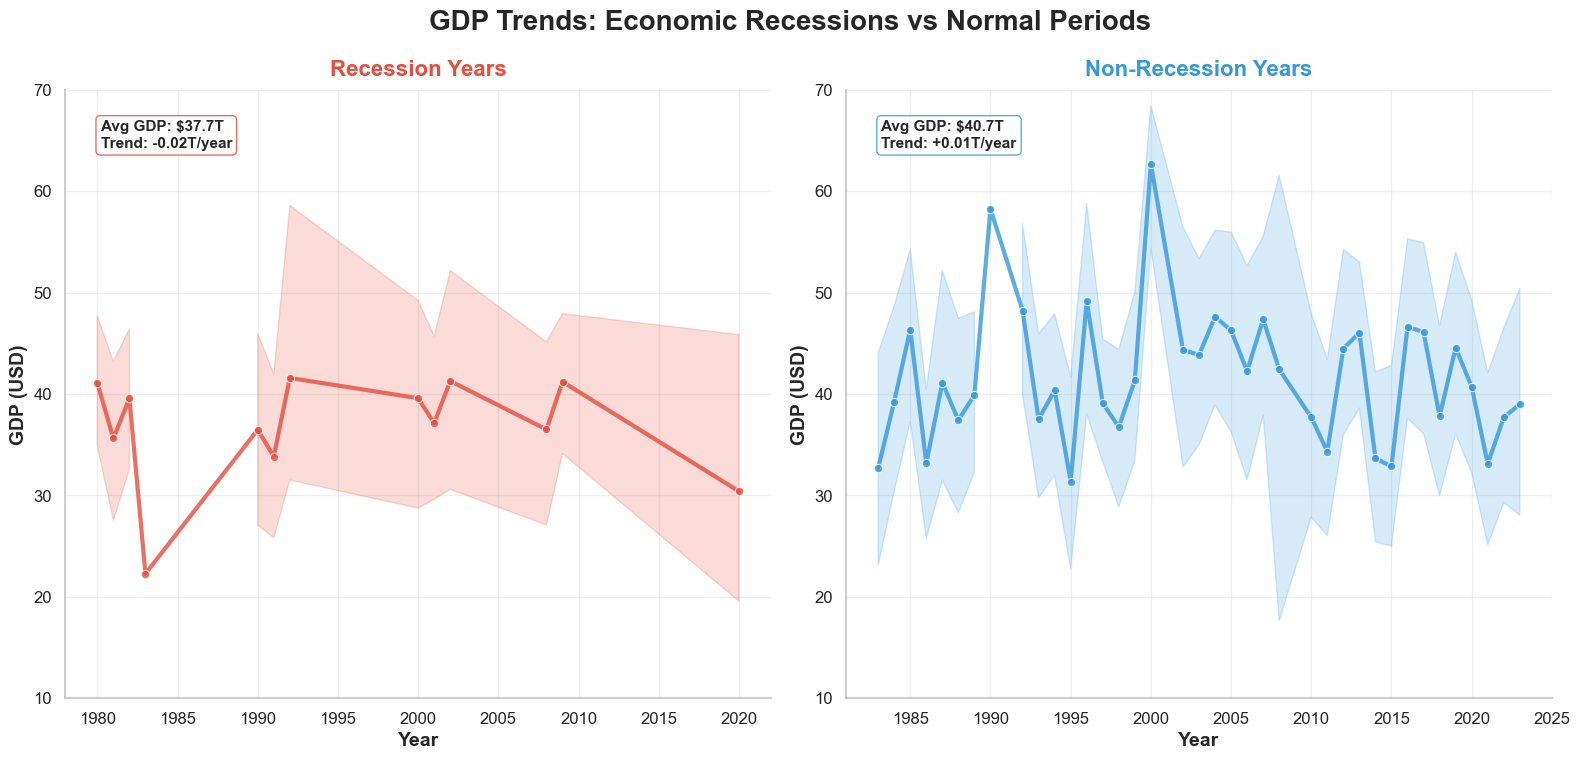

In [241]:
# Set seaborn style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)

# Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('GDP Trends: Economic Recessions vs Normal Periods\n', 
             fontsize=20, fontweight='bold', y=0.95)  # Moved main title down

recession_color = '#E74C3C' # red
non_recession_color = '#3498DB' # blue

## RECESSION
# Recession subplot 
sns.lineplot(x='Year', y='GDP', data=rec_data, color=recession_color, linewidth=3, marker='o', markersize=6, alpha=0.8, ax=ax1)

ax1.set_xlabel('Year', fontsize=14, fontweight='bold')
ax1.set_ylabel('GDP (USD)', fontsize=14, fontweight='bold')
ax1.set_title('Recession Years', fontsize=16, fontweight='bold', 
              color=recession_color, pad=10)
ax1.set_ylim(10, 70)
ax1.tick_params(labelsize=12)
ax1.grid(True, alpha=0.3)

# Add summary stats for recession
rec_gdp_mean = rec_data['GDP'].mean()
rec_gdp_trend = np.polyfit(rec_data['Year'], rec_data['GDP'], 1)[0]
ax1.text(0.05, 0.95, f'Avg GDP: ${rec_gdp_mean:.1f}T\nTrend: {rec_gdp_trend:+.2f}T/year', 
         transform=ax1.transAxes, fontsize=11, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8, edgecolor=recession_color),
         verticalalignment='top')

## NON-RECESSION
# Non-recession subplot 
sns.lineplot(x='Year', y='GDP', data=non_rec_data, color=non_recession_color, linewidth=3, marker='o', markersize=6, alpha=0.8, ax=ax2)

ax2.set_xlabel('Year', fontsize=14, fontweight='bold')
ax2.set_ylabel('GDP (USD)', fontsize=14, fontweight='bold')  # FIXED: Removed extra parenthesis
ax2.set_title('Non-Recession Years', fontsize=16, fontweight='bold', 
              color=non_recession_color, pad=10) 
ax2.set_ylim(10, 70)
ax2.tick_params(labelsize=12)
ax2.grid(True, alpha=0.3)

# Add summary stats for non-recession
non_rec_gdp_mean = non_rec_data['GDP'].mean()
non_rec_gdp_trend = np.polyfit(non_rec_data['Year'], non_rec_data['GDP'], 1)[0]
ax2.text(0.05, 0.95, f'Avg GDP: ${non_rec_gdp_mean:.1f}T\nTrend: {non_rec_gdp_trend:+.2f}T/year', 
         transform=ax2.transAxes, fontsize=11, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8, edgecolor=non_recession_color),
         verticalalignment='top')

for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

---


 ### Use Matplotlib to create scatterplots to compare (1) average vehicle price and sales volume and (2) consumer confidence and automobile sales during recessions

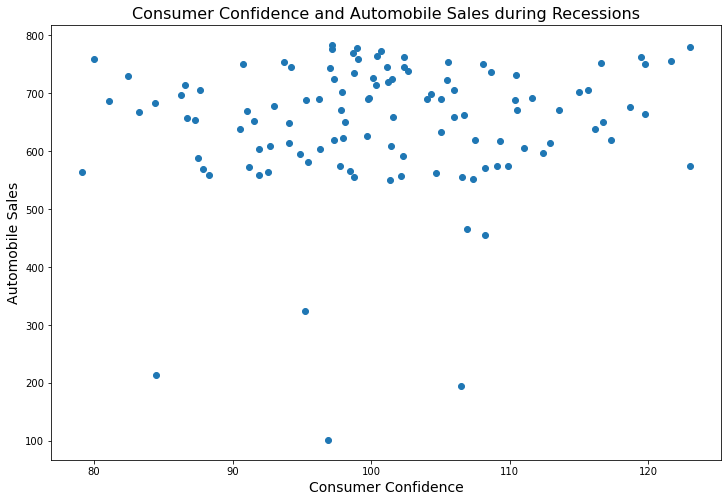

In [136]:
#create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]

# create the figure
plt.figure(figsize=(12,8))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
plt.xlabel('Consumer Confidence', fontsize=14)
plt.ylabel('Automobile Sales', fontsize=14)
plt.title('Consumer Confidence and Automobile Sales during Recessions', fontsize=16)
plt.show()

#### There is no obvious correlation between Automobile Sales and Consumer Confidence

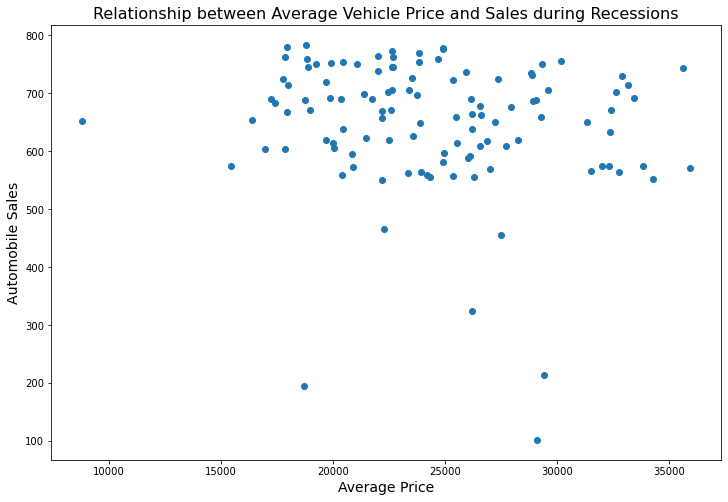

In [137]:
#create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]

# create the figure
plt.figure(figsize=(12,8))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Automobile Sales', fontsize=14)
plt.title('Relationship between Average Vehicle Price and Sales during Recessions', fontsize=16)
plt.show()

#### There is no obvious correlation between Automobile Sales and Price

----


 ### Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


<details><summary>Click here for a hint</summary>

<p>
     You can create two dataframe for recession and nonreccession period.
    <br> Calculate the sum of Advertising_Expenditure for both dataframes
    <br> Pass these total values to plt.pie(). May include labels as ['Recession', 'Non-Recession']
        <br>Feel Free to customie the pie further
    <br>title this plot as  - Advertising Expenditure during Recession and Non-Recession Periods</p>
</details>


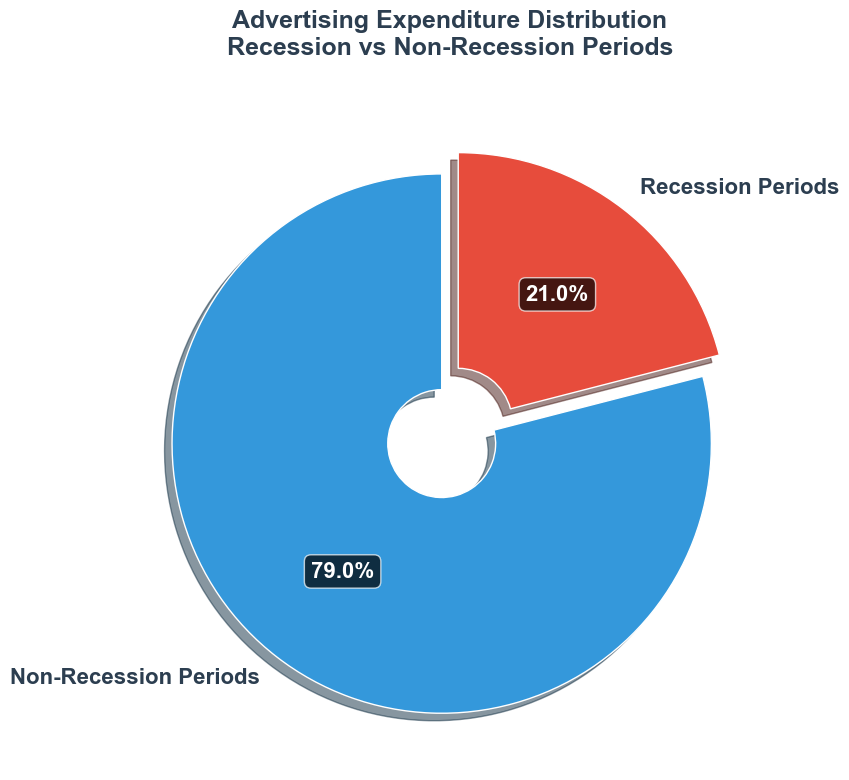

In [247]:
# Set seaborn style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)

# Create dataframes for recession and non-recession periods
rec_df = df[df['Recession'] == 1]
non_rec_df = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
rec_ad_total = rec_df['Advertising_Expenditure'].sum()
non_rec_ad_total = non_rec_df['Advertising_Expenditure'].sum()

# Create figure 
plt.figure(figsize=(12, 8))

colors = ['#3498DB', '#E74C3C']  

labels = ['Non-Recession Periods', 'Recession Periods']
sizes = [non_rec_ad_total, rec_ad_total]

# Create the pie chart with enhanced styling
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=(0.05, 0.05),  # Slight separation for better visual
    shadow=True,  # Add shadow for depth
    wedgeprops=dict(width=0.8),  # Ring style without borders
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)

# Percentage labels
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(16)
    autotext.set_bbox(dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7, edgecolor='white'))

for text, wedge in zip(texts, wedges):
    text.set_fontsize(16)
    text.set_fontweight('bold')
    text.set_color('#2C3E50')  # Dark color for better readability

plt.title('Advertising Expenditure Distribution\nRecession vs Non-Recession Periods', 
          fontsize=18, fontweight='bold', pad=30, color='#2C3E50')


# Remve the background grid 
plt.gca().set_facecolor('white')
plt.grid(False)

plt.tight_layout()
plt.show()

---


### Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


<details><summary>Click here for a hint</summary>

<p>
     You will be required to group vehicle type for sum of advertisement expenditure.
    <br> the plot a pie with the data, May include relevant labels
    <br>title this plot as  - Share of Each Vehicle Type in Total Expenditure during Recessions</p>
</details>


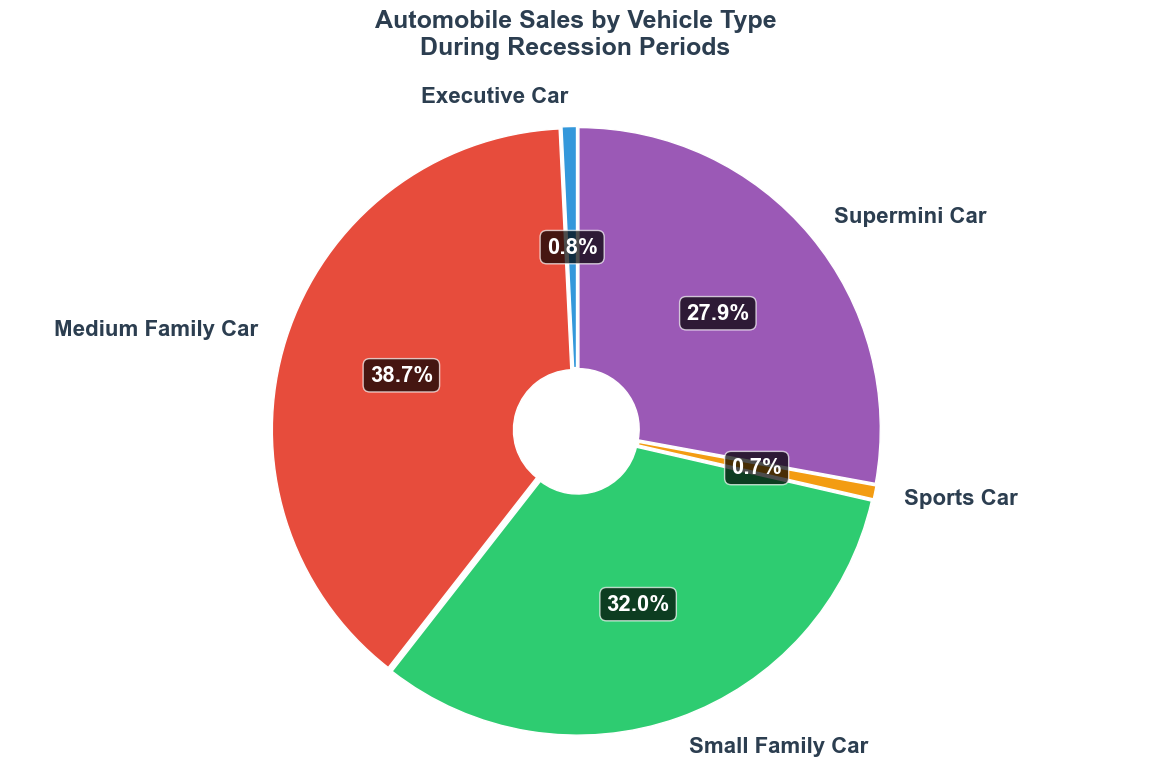

In [252]:
# Set seaborn style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)

# Create recession dataframe
rec_df = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTexpenditure = rec_df.groupby('Vehicle_Type')['Automobile_Sales'].sum()

# Create figure
plt.figure(figsize=(12, 8))
vehicle_colors = ['#3498DB', '#E74C3C', '#2ECC71', '#F39C12', '#9B59B6', '#1ABC9C']

labels = VTexpenditure.index
sizes = VTexpenditure.values

wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=vehicle_colors[:len(labels)],  # Use only as many colors as needed
    explode=[0.01] * len(labels),  # Smaller separation for all slices
    wedgeprops=dict(width=0.8),  # Ring style without borders
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(16)
    autotext.set_bbox(dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7, edgecolor='white'))

for text, wedge in zip(texts, wedges):
    text.set_fontsize(16)
    text.set_fontweight('bold')
    text.set_color('#2C3E50')  # Dark color for better readability

plt.title('Automobile Sales by Vehicle Type\nDuring Recession Periods', 
          fontsize=18, fontweight='bold', pad=30, color='#2C3E50')

plt.axis('equal')
plt.gca().set_facecolor('white')
plt.grid(False)

plt.tight_layout()
plt.show()

----


## Authors 
(of original course assignment)


[Dr. Pooja](author_link)


<!---|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
2024-01-05|0.2.1|Sowmyaa Gurusamy|Updated the lab instructions|
|2023-06-17|0.2|Pooja|Initial Lab Creation|
|2023-05-01|0.1|Shengkai|Create Lab Template|-->


Copyright © 2023 IBM Corporation. All rights reserved.
